In [1]:
import shelve
import sys
from pathlib import Path

import codebook.EDA as EDA
import codebook.clean as clean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
plt.style.use('raph-base')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 30)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)

np.random.seed(666)

In [3]:
print(sys.executable)
print(sys.version)
print(f'Pandas {pd.__version__}')

C:\Users\r2d4\miniconda3\envs\py3\python.exe
3.8.3 (default, May 19 2020, 06:50:17) [MSC v.1916 64 bit (AMD64)]
Pandas 1.1.3


## Load and Check Data

In [4]:
data_raw = pd.read_json("data/supplier_car.json", lines=True)
data_raw.replace("null", np.nan, inplace=True)

In [5]:
data_raw.sample(3)
data_raw.info()

,ID,MakeText,TypeName,TypeNameFull,ModelText,ModelTypeText,Attribute Names,Attribute Values,entity_id
915,1004,LAMBORGHINI,Gallardo 5.0 V10 Coupé SE,LAMBORGHINI Gallardo 5.0 V10 Coupé SE,GALLARDO,Gallardo 5.0 V10 Coupé SE,Seats,2,b0edbc85-3e45-4939-b4d7-0d83ea7e64de
17600,548,FERRARI,456M GTA,FERRARI 456M GTA,456,456M GTA,Hp,442,e1b87b8c-c0fd-4c6b-9f91-f8dd878aaa16
9428,428,CHEVROLET,Corvette ZR1,CHEVROLET Corvette ZR1,CORVETTE,Corvette ZR1,BodyColorText,grün mét.,e53bd031-6c40-4b4c-8dd7-e69b95f93ff8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21906 entries, 0 to 21905
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                21906 non-null  int64 
 1   MakeText          21906 non-null  object
 2   TypeName          21602 non-null  object
 3   TypeNameFull      21906 non-null  object
 4   ModelText         20957 non-null  object
 5   ModelTypeText     21906 non-null  object
 6   Attribute Names   21906 non-null  object
 7   Attribute Values  20542 non-null  object
 8   entity_id         21906 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.5+ MB


In [6]:
type(data_raw)

pandas.core.frame.DataFrame

In [7]:
test_car = data_raw[data_raw["ID"] == 40].reset_index(drop=True)
test_car

,ID,MakeText,TypeName,TypeNameFull,ModelText,ModelTypeText,Attribute Names,Attribute Values,entity_id
0,40,MERCEDES-BENZ,E 55 AMG Avantgarde,MERCEDES-BENZ E 55 AMG Avantgarde,E 55 AMG,E 55 AMG Avantgarde,DriveTypeText,Hinterradantrieb,621d3286-a7ee-4b57-87d0-8927bd1be65f
1,40,MERCEDES-BENZ,E 55 AMG Avantgarde,MERCEDES-BENZ E 55 AMG Avantgarde,E 55 AMG,E 55 AMG Avantgarde,FirstRegYear,1998,378183ed-2603-453f-9f6d-e416c892e5ea
2,40,MERCEDES-BENZ,E 55 AMG Avantgarde,MERCEDES-BENZ E 55 AMG Avantgarde,E 55 AMG,E 55 AMG Avantgarde,ConsumptionRatingText,NaN,1f68ae76-d33e-4e4a-8a54-afae92021de9
3,40,MERCEDES-BENZ,E 55 AMG Avantgarde,MERCEDES-BENZ E 55 AMG Avantgarde,E 55 AMG,E 55 AMG Avantgarde,BodyTypeText,Limousine,244a9daa-c898-4804-94ea-74b054ceb6c6
4,40,MERCEDES-BENZ,E 55 AMG Avantgarde,MERCEDES-BENZ E 55 AMG Avantgarde,E 55 AMG,E 55 AMG Avantgarde,FirstRegMonth,6,5f7cace3-3d3b-491a-90d1-185422c6fa9b
5,40,MERCEDES-BENZ,E 55 AMG Avantgarde,MERCEDES-BENZ E 55 AMG Avantgarde,E 55 AMG,E 55 AMG Avantgarde,City,Zuzwil,5f9e49ed-d325-48e7-8ede-0791e44dc768
6,40,MERCEDES-BENZ,E 55 AMG Avantgarde,MERCEDES-BENZ E 55 AMG Avantgarde,E 55 AMG,E 55 AMG Avantgarde,Seats,5,be670a91-b5b0-43f7-8804-dcc5a49eeb17
7,40,MERCEDES-BENZ,E 55 AMG Avantgarde,MERCEDES-BENZ E 55 AMG Avantgarde,E 55 AMG,E 55 AMG Avantgarde,Doors,4,85e23771-93c2-4cbf-b24b-4ef078e240cf
8,40,MERCEDES-BENZ,E 55 AMG Avantgarde,MERCEDES-BENZ E 55 AMG Avantgarde,E 55 AMG,E 55 AMG Avantgarde,BodyColorText,beige mét.,a4330224-143f-413c-ae28-5e308a67f51c
9,40,MERCEDES-BENZ,E 55 AMG Avantgarde,MERCEDES-BENZ E 55 AMG Avantgarde,E 55 AMG,E 55 AMG Avantgarde,Hp,354,bfb89401-cc8b-4db8-a091-8510b4ae8f1c


In [8]:
# Make sure all entity_id values are unique
assert data_raw["entity_id"].nunique() == len(data_raw)

# Count number of unique IDs in data, and number of rows per ID
data_raw["ID"].nunique()
len(data_raw) / data_raw["ID"].nunique()

1153

18.99913269731136

In [9]:
data_raw.columns

Index(['ID', 'MakeText', 'TypeName', 'TypeNameFull', 'ModelText',
       'ModelTypeText', 'Attribute Names', 'Attribute Values', 'entity_id'],
      dtype='object')

**Note:** 
- Seems we have 1153 cars in the dataset, but they do not all have 19 rows like the example car above (one seems to have 18 only ...)
- The Attribute Names / Values have to be pivoted so we have all relevant car info on one row (`entity_id` can be discarded)
- `ModelText` has NaN - ATTENTION - without handling, these rows will be lost during the pivot!

In [10]:
# Check the 'car' with 18 rows only - ha, it's a motorbike ... ;-)

for _, df_chunk in data_raw.groupby("ID"):
    if len(df_chunk) != 19:
        display(df_chunk.head(2))

,ID,MakeText,TypeName,TypeNameFull,ModelText,ModelTypeText,Attribute Names,Attribute Values,entity_id
2337,824,HARLEY-DAVIDSON,HPU Hurricane TC,HARLEY-DAVIDSON HPU Hurricane TC,None,HPU Hurricane TC,Km,100,ba00d8eb-5025-47e0-887e-9750b05bb025
3325,824,HARLEY-DAVIDSON,HPU Hurricane TC,HARLEY-DAVIDSON HPU Hurricane TC,None,HPU Hurricane TC,Properties,NaN,6dea6b19-6b8f-4fa1-9847-36091f6757aa


In [11]:
data_raw[data_raw["ModelText"].isnull()]["ID"].nunique()

50

## Restructure Data (Tidy Format)

In [12]:
def pivot_attributes(df):
    # Make sure you have no missing values in the Index columns!
    df=df.fillna("xxx").copy()
    df = df.pivot_table(
        index=["ID", "MakeText", "TypeName", "TypeNameFull", "ModelText", "ModelTypeText"], 
        columns="Attribute Names", values="Attribute Values", aggfunc="max",
    ).reset_index()
    df.columns.name = None
    df = df.replace("xxx", np.nan)
    return df

In [13]:
test_pivot = pivot_attributes(test_car)
test_pivot

,ID,MakeText,TypeName,TypeNameFull,ModelText,ModelTypeText,BodyColorText,BodyTypeText,Ccm,City,Co2EmissionText,ConditionTypeText,ConsumptionRatingText,ConsumptionTotalText,Doors,DriveTypeText,FirstRegMonth,FirstRegYear,FuelTypeText,Hp,InteriorColorText,Km,Properties,Seats,TransmissionTypeText
0,40,MERCEDES-BENZ,E 55 AMG Avantgarde,MERCEDES-BENZ E 55 AMG Avantgarde,E 55 AMG,E 55 AMG Avantgarde,beige mét.,Limousine,5439,Zuzwil,301 g/km,Occasion,nan,12.6 l/100km,4,Hinterradantrieb,6,1998,Benzin,354,schwarz,49900,"""Ab MFK""",5,Automat


In [14]:
test_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1 non-null      int64  
 1   MakeText               1 non-null      object 
 2   TypeName               1 non-null      object 
 3   TypeNameFull           1 non-null      object 
 4   ModelText              1 non-null      object 
 5   ModelTypeText          1 non-null      object 
 6   BodyColorText          1 non-null      object 
 7   BodyTypeText           1 non-null      object 
 8   Ccm                    1 non-null      object 
 9   City                   1 non-null      object 
 10  Co2EmissionText        1 non-null      object 
 11  ConditionTypeText      1 non-null      object 
 12  ConsumptionRatingText  0 non-null      float64
 13  ConsumptionTotalText   1 non-null      object 
 14  Doors                  1 non-null      object 
 15  DriveTypeT

In [15]:
data_pivot = pivot_attributes(data_raw)
assert data_pivot["ID"].nunique() == data_raw["ID"].nunique()

In [16]:
len(data_pivot)
data_pivot.sample(3)

1153

,ID,MakeText,TypeName,TypeNameFull,ModelText,ModelTypeText,BodyColorText,BodyTypeText,Ccm,City,Co2EmissionText,ConditionTypeText,ConsumptionRatingText,ConsumptionTotalText,Doors,DriveTypeText,FirstRegMonth,FirstRegYear,FuelTypeText,Hp,InteriorColorText,Km,Properties,Seats,TransmissionTypeText
899,900,MERCEDES-BENZ,CLK 320 Sport,MERCEDES-BENZ CLK 320 Sport,CLK 320,CLK 320 Sport,silber mét.,Coupé,3199,Zuzwil,242 g/km,Occasion,G,10.1 l/100km,2,Hinterradantrieb,6,1998,Benzin,218,blau,61000,"""Ab MFK""",4,Automat
37,38,PORSCHE,Cayenne Turbo,PORSCHE Cayenne Turbo,CAYENNE,Cayenne Turbo,anthrazit mét.,SUV / Geländewagen,4806,Zuzwil,358 g/km,Occasion,G,14.9 l/100km,5,Allrad,3,2007,Benzin,540,schwarz,36700,"""Ab MFK""",5,Automat sequentiell
930,931,MERCEDES-BENZ,300SL W198,MERCEDES-BENZ 300 300SL W198,300,300 300SL W198,silber mét.,Coupé,2995,Sursee,NaN,Occasion,NaN,NaN,2,Hinterradantrieb,5,1955,NaN,215,rot,5000,NaN,0,Schaltgetriebe


In [17]:
data_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     1153 non-null   int64 
 1   MakeText               1153 non-null   object
 2   TypeName               1137 non-null   object
 3   TypeNameFull           1153 non-null   object
 4   ModelText              1103 non-null   object
 5   ModelTypeText          1153 non-null   object
 6   BodyColorText          1153 non-null   object
 7   BodyTypeText           1152 non-null   object
 8   Ccm                    1153 non-null   object
 9   City                   1153 non-null   object
 10  Co2EmissionText        812 non-null    object
 11  ConditionTypeText      1153 non-null   object
 12  ConsumptionRatingText  652 non-null    object
 13  ConsumptionTotalText   850 non-null    object
 14  Doors                  1153 non-null   object
 15  DriveTypeText        

## Normalize Data

In [18]:
test_pivot

,ID,MakeText,TypeName,TypeNameFull,ModelText,ModelTypeText,BodyColorText,BodyTypeText,Ccm,City,Co2EmissionText,ConditionTypeText,ConsumptionRatingText,ConsumptionTotalText,Doors,DriveTypeText,FirstRegMonth,FirstRegYear,FuelTypeText,Hp,InteriorColorText,Km,Properties,Seats,TransmissionTypeText
0,40,MERCEDES-BENZ,E 55 AMG Avantgarde,MERCEDES-BENZ E 55 AMG Avantgarde,E 55 AMG,E 55 AMG Avantgarde,beige mét.,Limousine,5439,Zuzwil,301 g/km,Occasion,nan,12.6 l/100km,4,Hinterradantrieb,6,1998,Benzin,354,schwarz,49900,"""Ab MFK""",5,Automat


In [19]:
# Create a target_structure dictionary

target_data = pd.read_excel("data/target_data.xlsx", engine="openpyxl")
target_structure = dict(zip(target_data.columns, target_data.dtypes.values))
target_structure

{'carType': dtype('O'),
 'color': dtype('O'),
 'condition': dtype('O'),
 'currency': dtype('O'),
 'drive': dtype('O'),
 'city': dtype('O'),
 'country': dtype('O'),
 'make': dtype('O'),
 'manufacture_year': dtype('int64'),
 'mileage': dtype('float64'),
 'mileage_unit': dtype('O'),
 'model': dtype('O'),
 'model_variant': dtype('O'),
 'price_on_request': dtype('bool'),
 'type': dtype('O'),
 'zip': dtype('O'),
 'manufacture_month': dtype('float64'),
 'fuel_consumption_unit': dtype('O')}

In [20]:
# Create a mapping_dict (manually)

MAIN_MAPPER = {
    "carType": "BodyTypeText",  # needs mapping of values
    "color": "BodyColorText_mapped",  # needs mapping of values, we lose the "métalisé" information though - MAPPED
    "condition": "ConditionTypeText",  # needs mapping, tricky see illustrations
    "currency": None,  # has to be determined by seller / inferred from country of listing
    "drive": "DriveTypeText",  # needs mapping of values
    "city": "City",  # seems ok
    "country": None,  # missing, should be entered by seller / infered from seller address
    "make": "MakeText_mapped",  # needs mapping of values (e.g. UPPER vs. Upper) - MAPPED
    "manufacture_year": "FirstRegYear",  # WARNING: these date do not mean the same. Check with seller
    "mileage": "Km", # seems ok
    "mileage_unit": None,  # can be inferred from seller / country of listing, in this example case it is easy
    "model": "ModelText",  # seems ok
    "model_variant": "ModelTypeText",  # in the target data ofte some "Freitext Ausstattungsmerkmale" are concatenated
    "price_on_request": None,  # must be specified by seller
    "type": None,  # do we want to allow other values than "car"? We have only one motorbike in the new dataset ...
    "zip": None,  # missing, should be entered by seller / infered from seller address
    "manufacture_month": "FirstRegMonth",  # see again the WARNING from above
    "fuel_consumption_unit": "ConsumptionTotalText"  # can be inferred, maybe use a little regex
}

Some general problems:
    - NULL values
    - NO ID in target data

### Map Colors

In [53]:
target_data["color"].unique().tolist()

['White',
 'Other',
 'Blue',
 'Black',
 'Silver',
 'Brown',
 'Red',
 'Gray',
 'Green',
 'Beige',
 'Yellow',
 'Orange',
 'Purple',
 'Gold']

In [54]:
data_pivot["BodyColorText"].unique().tolist()

['anthrazit',
 'anthrazit mét.',
 'beige',
 'beige mét.',
 'blau',
 'blau mét.',
 'bordeaux',
 'bordeaux mét.',
 'braun',
 'braun mét.',
 'gelb',
 'gelb mét.',
 'gold',
 'gold mét.',
 'grau',
 'grau mét.',
 'grün',
 'grün mét.',
 'orange',
 'orange mét.',
 'rot',
 'rot mét.',
 'schwarz',
 'schwarz mét.',
 'silber',
 'silber mét.',
 'violett mét.',
 'weiss',
 'weiss mét.']

In [23]:
# Create a mapping_dict (manually)

COLOR_MAPPER = {
     'weiss': 'White',
     'blau': 'Blue',
     'schwarz': 'Black',
     'silber': 'Silver',
     'braun': 'Brown',
     'rot': 'Red',
     'anthrazit': 'Gray',
     'grau': 'Gray',
     'grün': 'Green',
     'beige': 'Beige',
     'gelb': 'Yellow',
     'orange': 'Orange',
     'bordeaux': 'Purple',
     'gold': 'Gold'}

In [26]:
def map_colors(df, color_mapper=COLOR_MAPPER):
    """Map the colors using a mapping dictionary. If a color
    is not found in the dict, "Other" is used as default value.
    Note: We lose the `mét.` information in this process.
    """
    df["BodyColorText_mapped"] = (
        df["BodyColorText"].str.split(" ")
        .str.get(0).map(color_mapper).fillna("Other")
    )
    return df


def check_color_mapping(df):
    """Log the result of the color mapping. Warn if a certain
    color had to be mapped to the default value."""
    df = df.copy()
    defaults = df[df["BodyColorText_mapped"] == "Other"]["BodyColorText"]
    if len(defaults) > 0:
        message = f"The following color(s) have been mapped to 'Other': {defaults.unique()}"
    else:
        message = "All colors have been mapped to specific values."
    return message

In [27]:
data_pivot = map_colors(data_pivot)
message = check_color_mapping(data_pivot)
print(message)

The following color(s) have been mapped to 'Other': ['violett mét.']


###  Map Make

In [28]:
makes_raw = data_pivot["MakeText"].unique()
makes_raw

array(['MERCEDES-BENZ', 'AUDI', 'CHEVROLET', 'PORSCHE', 'FORD (USA)',
       'ASTON MARTIN', 'LOTUS', 'LAMBORGHINI', 'RUF', 'BMW', 'LAND ROVER',
       'BMW-ALPINA', 'RENAULT', 'BUGATTI', 'BENTLEY', 'GIOTTILINE',
       'TRIUMPH', 'LINCOLN', 'FERRARI', 'HUMMER', 'OPEL', 'JAGUAR',
       'ALFA ROMEO', 'LANCIA', 'NSU', 'TOYOTA', 'DAIHATSU', 'CITROEN',
       'FORD', 'MASERATI', 'VW', 'MG', 'HONDA', 'SUBARU', 'VOLVO',
       'MITSUBISHI', 'FIAT', 'MORGAN', 'ROLLS-ROYCE', 'DAEWOO', 'MAZDA',
       'CHRYSLER', 'DAIMLER', 'AUSTIN-HEALEY', 'DODGE', 'TALBOT', 'SIMCA',
       'McLAREN', 'LEXUS', 'PEUGEOT', 'SAAB', 'MARCOS', 'NISSAN', 'SEAT',
       'JEEP', 'TRABANT', 'YES!', 'HYUNDAI', 'MATRA', 'KAISER',
       'HARLEY-DAVIDSON', 'SMART', 'PGO', 'DATSUN', 'WIESMANN',
       'DE TOMASO', 'DeLorean', 'AUTOBIANCHI', 'MINI', 'AGM'],
      dtype=object)

In [58]:
def create_make_look_up(df):
    """Create a mapping of all make values in 
    the target data frame with x.lower(): x. This
    will help to map the makes of the supplier 
    data independent of the case.
    """
    make_look_up = dict(zip(
        [x.lower() for x in df["make"].unique().astype(str)],
        list(df["make"].unique().astype(str))
    ))
    return make_look_up

def map_makes(df, make_look_up):
    """Map the makes using the look_up. If a make cannot be
    mapped we use it anyway with an appendix "_SUP". So 
    we can decide what to do about it. The make info is to
    important to be defaulted.
    """
    df["MakeText_mapped"] = (
        data_pivot["MakeText"].str.lower().map(make_look_up)
    )
    df["MakeText_mapped"] = np.where(
        df["MakeText_mapped"].isna(),
        df["MakeText"] + "_SUP",
        df["MakeText_mapped"]
    )
    return df

def check_make_mapping(df):
    """Log the result of the make mapping. Warn if a certain
    make could not be mapped. In this case we will keep the
    original values and not map to a default value.
    """
    df = df.copy()
    not_mapped = df[df["MakeText_mapped"].str.endswith("_SUP")]["MakeText"]
    for make in not_mapped.unique():
        print(make)

In [59]:
MAKE_LOOK_UP = create_make_look_up(target_data)

# Check
list(MAKE_LOOK_UP.items())[:5]

[('toyota', 'Toyota'),
 ('ferrari', 'Ferrari'),
 ('porsche', 'Porsche'),
 ('rolls-royce', 'Rolls-Royce'),
 ('gumpert', 'Gumpert')]

In [60]:
make_look_up = create_make_look_up(target_data)
data_pivot = map_makes(data_pivot, make_look_up)
message = check_make_mapping(data_pivot)

FORD (USA)
BMW-ALPINA
GIOTTILINE
DAIHATSU
DAEWOO
SEAT
HYUNDAI
KAISER
HARLEY-DAVIDSON
DeLorean


In [36]:
print(message)

The following make(s) have not been mapped to pre-existing values: ['FORD (USA)' 'BMW-ALPINA' 'GIOTTILINE' 'DAIHATSU' 'DAEWOO' 'SEAT'
 'HYUNDAI' 'KAISER' 'HARLEY-DAVIDSON' 'DeLorean']


### Map Condition

Not implemented.

In [37]:
data_pivot["ConditionTypeText"].unique()
target_data["condition"].unique()

array(['Occasion', 'Oldtimer', 'Neu', 'Vorführmodell'], dtype=object)

array(['Used', 'Original Condition', 'Restored', 'New',
       'Used with guarantee', 'Restoration Project'], dtype=object)

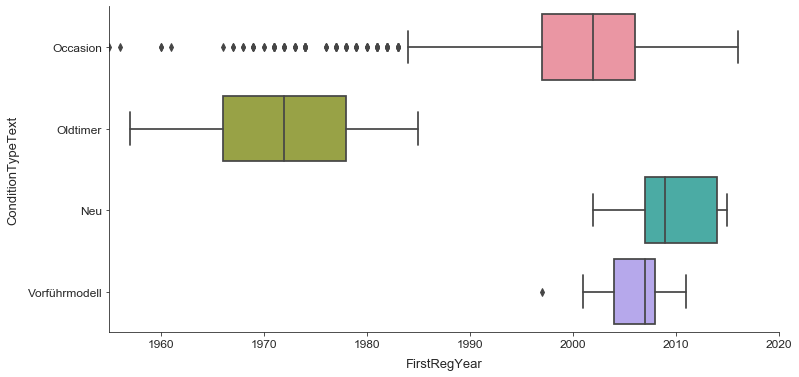

In [38]:
sns.boxplot(data=data_pivot, x=data_pivot["FirstRegYear"].astype(int), y="ConditionTypeText")
plt.xlim(1955, 2020);

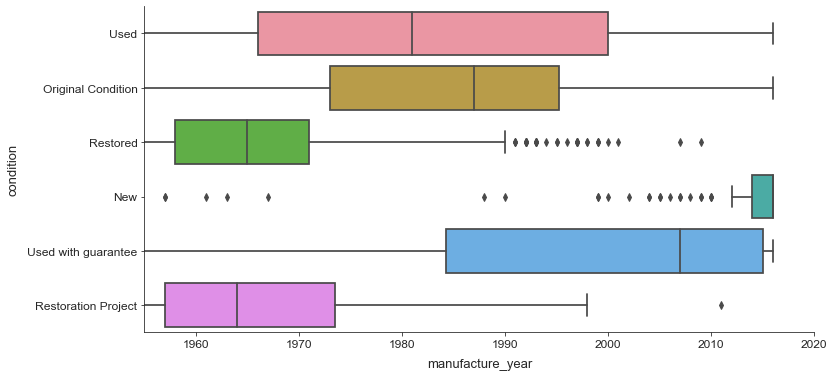

In [39]:
sns.boxplot(data=target_data, x="manufacture_year", y="condition")
plt.xlim(1955, 2020);

## Integrate Data (Target Format)

In [40]:
data_pivot.columns

Index(['ID', 'MakeText', 'TypeName', 'TypeNameFull', 'ModelText',
       'ModelTypeText', 'BodyColorText', 'BodyTypeText', 'Ccm', 'City',
       'Co2EmissionText', 'ConditionTypeText', 'ConsumptionRatingText',
       'ConsumptionTotalText', 'Doors', 'DriveTypeText', 'FirstRegMonth',
       'FirstRegYear', 'FuelTypeText', 'Hp', 'InteriorColorText', 'Km',
       'Properties', 'Seats', 'TransmissionTypeText', 'BodyColorText_mapped',
       'MakeText_mapped'],
      dtype='object')

In [42]:
MAIN_MAPPER

{'carType': 'BodyTypeText',
 'color': 'BodyColorText_mapped',
 'condition': 'ConditionTypeText',
 'currency': None,
 'drive': 'DriveTypeText',
 'city': 'City',
 'country': None,
 'make': 'MakeText_mapped',
 'manufacture_year': 'FirstRegYear',
 'mileage': 'Km',
 'mileage_unit': None,
 'model': 'ModelText',
 'model_variant': 'ModelTypeText',
 'price_on_request': None,
 'type': None,
 'zip': None,
 'manufacture_month': 'FirstRegMonth',
 'fuel_consumption_unit': 'ConsumptionTotalText'}

In [46]:
def create_column_lists(df, df_target, MAIN_MAPPER):
    cols_to_delete = [x for x in df.columns if x not in MAIN_MAPPER.values()]
    cols_to_rename = {v: k for k, v in MAIN_MAPPER.items() if v}
    cols_tbd = [k for k, v in MAIN_MAPPER.items() if v is None]
    cols_target = df_target.columns.tolist()
    return cols_to_delete, cols_to_rename, cols_tbd, cols_target

In [47]:
column_lists = create_column_lists(data_pivot, target_data, MAIN_MAPPER)

In [52]:
for l in column_lists:
    print(l)

['ID', 'MakeText', 'TypeName', 'TypeNameFull', 'BodyColorText', 'Ccm', 'Co2EmissionText', 'ConsumptionRatingText', 'Doors', 'FuelTypeText', 'Hp', 'InteriorColorText', 'Properties', 'Seats', 'TransmissionTypeText']
{'BodyTypeText': 'carType', 'BodyColorText_mapped': 'color', 'ConditionTypeText': 'condition', 'DriveTypeText': 'drive', 'City': 'city', 'MakeText_mapped': 'make', 'FirstRegYear': 'manufacture_year', 'Km': 'mileage', 'ModelText': 'model', 'ModelTypeText': 'model_variant', 'FirstRegMonth': 'manufacture_month', 'ConsumptionTotalText': 'fuel_consumption_unit'}
['currency', 'country', 'mileage_unit', 'price_on_request', 'type', 'zip']
['carType', 'color', 'condition', 'currency', 'drive', 'city', 'country', 'make', 'manufacture_year', 'mileage', 'mileage_unit', 'model', 'model_variant', 'price_on_request', 'type', 'zip', 'manufacture_month', 'fuel_consumption_unit']


In [76]:
def bring_df_to_target_format(df, cols_to_delete, cols_to_rename, cols_tbd, cols_target):
    df = df.drop(cols_to_delete, axis=1)
    df = df.rename(columns=cols_to_rename)
    for col in cols_tbd:
        df[col] = "TBD"
    assert  df.shape[1] == len(cols_target)
    df = df.reindex(cols_target, axis=1)
#     df = df.fillna("null")
    return df
    

In [77]:
df_final = bring_df_to_target_format(data_pivot, *column_lists)
df_final.head(2)

,carType,color,condition,currency,drive,city,country,make,manufacture_year,mileage,mileage_unit,model,model_variant,price_on_request,type,zip,manufacture_month,fuel_consumption_unit
0,Limousine,Gray,Occasion,TBD,Allrad,Zuzwil,TBD,Mercedes-Benz,1999,31900,TBD,E 320,E 320 Elégance 4-Matic,TBD,TBD,TBD,1,11.5 l/100km
1,Kombi,Gray,Occasion,TBD,Allrad,Zuzwil,TBD,Audi,2008,25400,TBD,RS6,RS6 Avant 5.0 V10 quattro,TBD,TBD,TBD,7,14.0 l/100km


In [78]:
pd.DataFrame(df_final.loc[122:, :])

,carType,color,condition,currency,drive,city,country,make,manufacture_year,mileage,mileage_unit,model,model_variant,price_on_request,type,zip,manufacture_month,fuel_consumption_unit
122,Limousine,Blue,Occasion,TBD,NaN,Zuzwil,TBD,BMW-ALPINA_SUP,1986,199300,TBD,5 SERIES,5 SERIES B7 TURBO,TBD,TBD,TBD,5,NaN
123,Coupé,Blue,Occasion,TBD,Hinterradantrieb,Porrentruy,TBD,Ferrari,2003,42500,TBD,F360,F360 Modena Berlinetta,TBD,TBD,TBD,11,19.3 l/100km
124,Kombi,Blue,Occasion,TBD,Allrad,Zuzwil,TBD,Audi,2008,114200,TBD,RS6,RS6 Avant 5.0 V10 quattro,TBD,TBD,TBD,7,14.0 l/100km
125,Limousine,Blue,Occasion,TBD,Hinterradantrieb,Zuzwil,TBD,BMW,1998,26200,TBD,728,728i,TBD,TBD,TBD,5,10.3 l/100km
126,Kombi,Blue,Occasion,TBD,Allrad,Zuzwil,TBD,Audi,2003,64500,TBD,RS6,RS6 Avant quattro,TBD,TBD,TBD,5,14.6 l/100km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Limousine,White,Occasion,TBD,Hinterradantrieb,Zuzwil,TBD,Mercedes-Benz,2007,102000,TBD,S 65 AMG,S 65 AMG L,TBD,TBD,TBD,3,14.8 l/100km
1149,Limousine,White,Occasion,TBD,Hinterradantrieb,Zuzwil,TBD,BMW,1998,39700,TBD,M5,M5,TBD,TBD,TBD,10,13.9 l/100km
1150,Limousine,White,Occasion,TBD,Vorderradantrieb,Zuzwil,TBD,Mercedes-Benz,2005,99000,TBD,A 150,A 150 Classic,TBD,TBD,TBD,10,6.7 l/100km
1151,Coupé,White,Occasion,TBD,Allrad,Porrentruy,TBD,Lamborghini,2008,5900,TBD,NaN,Reventon Coupé,TBD,TBD,TBD,4,NaN


## Save the two Mapping Dicts

In [ ]:
with shelve.open('data/mapper_dicts', 'c') as shelf:   
    shelf["main_mapper"] = MAIN_MAPPER
    shelf["color_mapper"] = COLOR_MAPPER